# Overview

In [ ]:
!pip install ydata_profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 67.8 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=bbf353d5b3121312e5f3ccf76de11cb712eee92777a61fdc5013badbb4ac1678
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


Mental health significantly impacts society and individuals, affecting well-being, work performance, and relationships. Estimates suggest that millions worldwide experience mental health issues annually, with conditions like major depression affecting 1 in 3 women and 1 in 5 men over their lifetimes. Despite its prevalence, mental health conditions often go untreated due to stigma and inadequate access to quality care.

Therefore, this project proposes the development of a deep learning model to predict an individual's susceptibility to experiencing difficulties in coping with mental health challenges.

The following data is a collection of medical and demographic data from patients, along with their mood (*Low, Medium, High*). This dataset includes 292,364 rows and 17 columns:

1. Timestamp
2. Gender
3. Country
4. Occupation
5. self_employed
6. family_history
7. treatment
8. Days_Indoors
9. Growing_Stress
10. Changes_Habits
11. Mental_Health_History
12. Mood_Swings
13. Coping_Struggles
14. Work_Interest
15. Social_Weakness
16. mental_health_interview
17. care_options

From this analysis, healthcare professionals and researchers may find a resource in identifying patients at risk and developing early intervention plans.

## Libraries

In [ ]:
# Import libraries for numerical computations
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport


# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for data preprocessing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

# Import libraries for model evaluation
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
    RocCurveDisplay,
)

# Import libraries for machine learning
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Suppress warnings (use with caution)
import warnings
warnings.filterwarnings("ignore")

## Read Data

In [ ]:
df = pd.read_csv("/content/Mental Health Dataset.csv")
df.head()

print("Number of rows after dropping missing Mood_Swings values:", df.shape[0])


Number of rows after dropping missing Mood_Swings values: 292364


In [ ]:
nan_rows = df[df['Mood_Swings'].isna()]
nan_rows

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options


In [ ]:
profile = ProfileReport(df, title= 'Mood_Swings Dataset Profiling', explorative=True)
profile.to_file('ydata_profiling_Mood_Swings.html') #conducted data profiling and stored the output in a html file

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# EDA - Cleaning
1. Understand variables
2. Clean dataset (missing data, redundant data, outliers)

### 1. Gather Information About the Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

In [ ]:
df.describe()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
count,292364,292364,292364,292364,287162,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364
unique,580,2,35,5,2,2,2,5,3,3,3,3,2,3,3,3,3
top,8/27/2014 11:43,Male,United States,Housewife,No,No,Yes,1-14 days,Maybe,Yes,No,Medium,No,No,Maybe,No,No
freq,2384,239850,171308,66351,257994,176832,147606,63548,99985,109523,104018,101064,154328,105843,103393,232166,118886


### 2a) Check Missing Variables

In [ ]:
print('Percentage of Missing Values')
(df.isna().mean() * 100).round(1)

Percentage of Missing Values


,0
Timestamp,0.0
Gender,0.0
Country,0.0
Occupation,0.0
self_employed,1.8
family_history,0.0
treatment,0.0
Days_Indoors,0.0
Growing_Stress,0.0
Changes_Habits,0.0


In [ ]:
df.dropna(inplace = True)

#### Since there is less than 2% missing data, dropping those rows should have minimal impact.

In [ ]:
df.isna().sum()

,0
Timestamp,0
Gender,0
Country,0
Occupation,0
self_employed,0
family_history,0
treatment,0
Days_Indoors,0
Growing_Stress,0
Changes_Habits,0


### 2b) Check for Duplicate Entries, Unnecessary Columns, and Data Formatting

In [ ]:
# Print amount of duplicates
print('Amount of duplicates: {:,}'.format(df.duplicated().sum()))

# Print percentage of duplicates
print('Percentage of duplicates: {:.1%}'.format(df.duplicated().mean()))

Amount of duplicates: 2,304
Percentage of duplicates: 0.8%


In [ ]:

df.drop_duplicates(inplace = True)

print('Amount of duplicates: {:,}'.format(df.duplicated().sum()))

Amount of duplicates: 0


#### Since there is less than 1% duplicate data, dropping those rows should have minimal impact.

In [ ]:
# We are not going to use the Timestamp column in our analysis
df.drop(columns = "Timestamp", inplace = True)

### 2c) Check Outliers

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 284858 entries, 3 to 292363
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Gender                   284858 non-null  object
 1   Country                  284858 non-null  object
 2   Occupation               284858 non-null  object
 3   self_employed            284858 non-null  object
 4   family_history           284858 non-null  object
 5   treatment                284858 non-null  object
 6   Days_Indoors             284858 non-null  object
 7   Growing_Stress           284858 non-null  object
 8   Changes_Habits           284858 non-null  object
 9   Mental_Health_History    284858 non-null  object
 10  Mood_Swings              284858 non-null  object
 11  Coping_Struggles         284858 non-null  object
 12  Work_Interest            284858 non-null  object
 13  Social_Weakness          284858 non-null  object
 14  mental_health_interview  

#### Since most of the data are type object or datetime, we cannot remove outliers.

# EDA - Visualizations

In [ ]:
df.head()

,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
3,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
5,Female,Poland,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Not sure
6,Female,Australia,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
7,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No


In [ ]:
def countsplot(category):
  """
  Creates a count plot and returns a DataFrame with counts and percentages.

  Args:
      category (str): The column name for the categorical variable to plot.

  Returns:
      pandas.DataFrame: A DataFrame containing counts and percentages for each category.
  """

  # Create count plot with dynamic title
  sns.countplot(data = df, x = category)
  plt.ylabel("Count")
  plt.title(f"{category} Distribution")
  plt.show()

  # Calculate counts and percentages
  category_counts = df[category].value_counts()
  category_percentages = df[category].value_counts(normalize = True)

  # Combine counts and percentages into a DataFrame
  stats_df = pd.DataFrame({"Count": category_counts, "Proportion": category_percentages})
  stats_df["Count"] = stats_df["Count"].apply("{:,}".format)
  stats_df["Proportion"] = stats_df["Proportion"].apply("{:.1%}".format)

  return stats_df

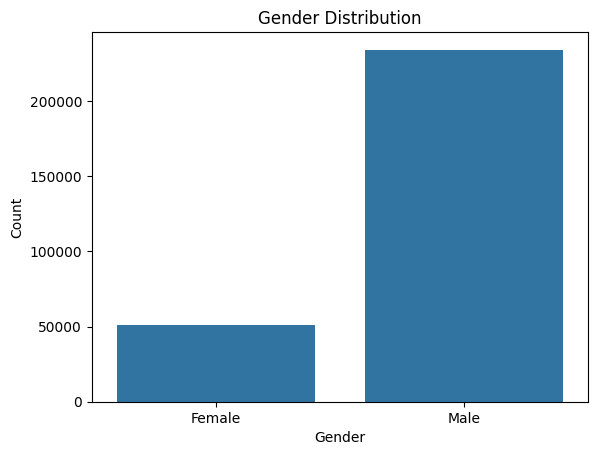

,Count,Proportion
Gender,,
Male,"234,000",82.1%
Female,"50,858",17.9%


In [ ]:
countsplot("Gender")

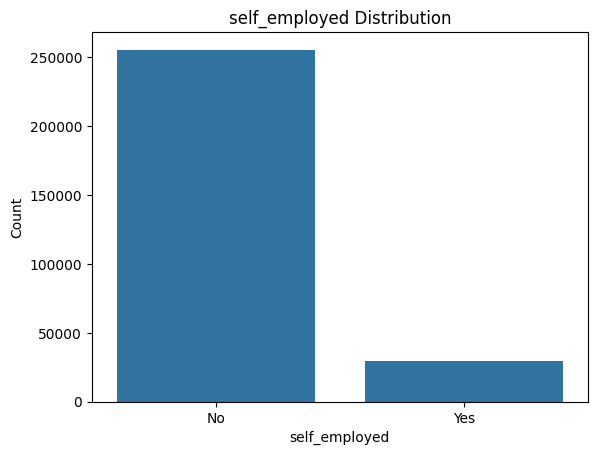

,Count,Proportion
self_employed,,
No,"255,711",89.8%
Yes,"29,147",10.2%


In [ ]:
countsplot("self_employed")

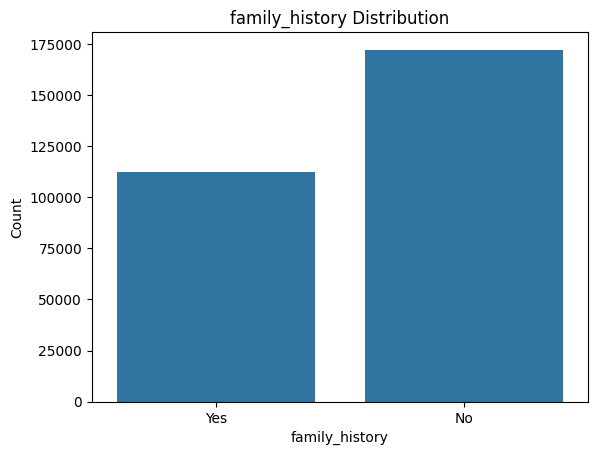

,Count,Proportion
family_history,,
No,"172,357",60.5%
Yes,"112,501",39.5%


In [ ]:
countsplot("family_history")

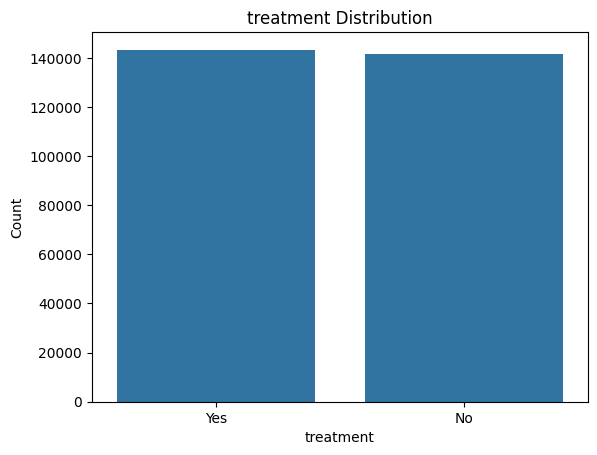

,Count,Proportion
treatment,,
Yes,"143,331",50.3%
No,"141,527",49.7%


In [ ]:
countsplot("treatment")

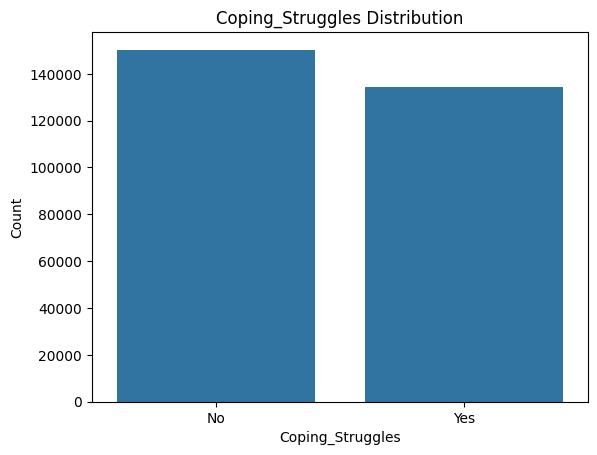

,Count,Proportion
Coping_Struggles,,
No,"150,318",52.8%
Yes,"134,540",47.2%


In [ ]:
countsplot("Coping_Struggles")

In [ ]:
def top_10_bar(category, x_rotation = 45):
    """
    Plots a bar plot showing the distribution of a categorical variable for the top 10 categories.

    Args:
        category (str): The column name for the categorical variable to plot.
        x_rotation (int, optional): The number of degrees to rotate the x-axis labels. Defaults to 45.
    """
    # Get the top 10 categories and their counts in a DataFrame
    top_10_df = df[category].value_counts().head(10).reset_index()

    # Plotting
    sns.barplot(data = top_10_df, x = category, y = "count")
    plt.title(category)
    plt.xticks(rotation = x_rotation)
    plt.xlabel(category)
    plt.ylabel("Count")
    plt.show()

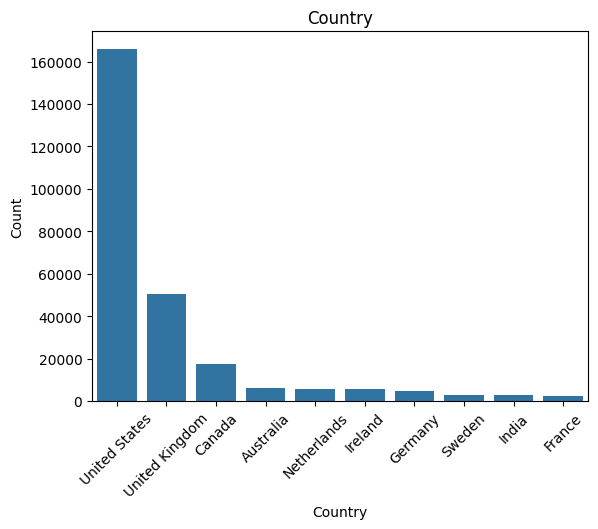

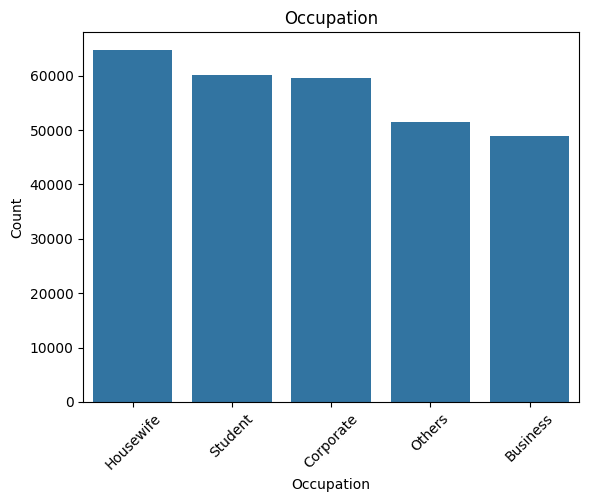

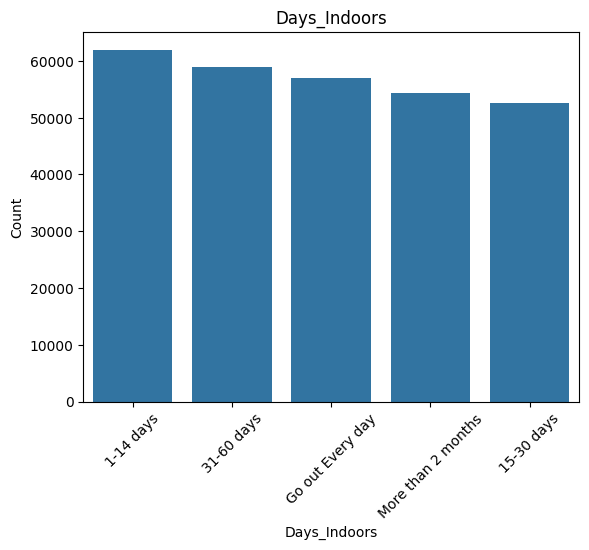

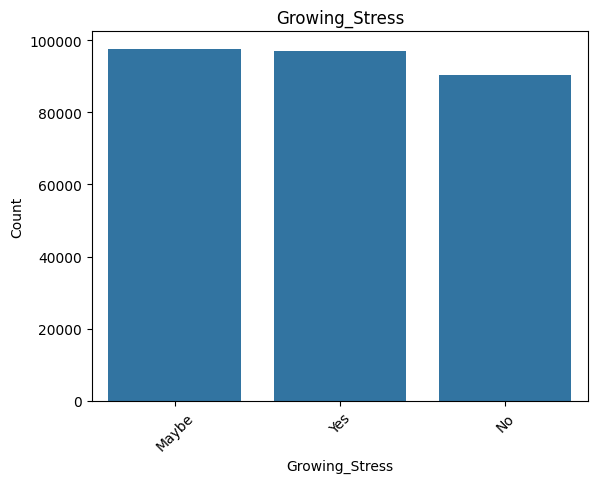

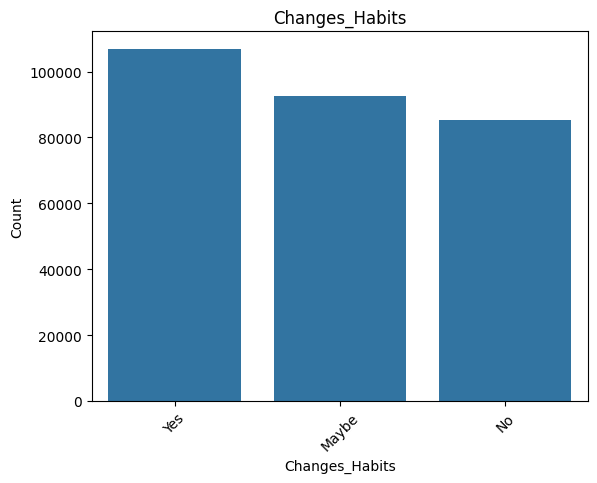

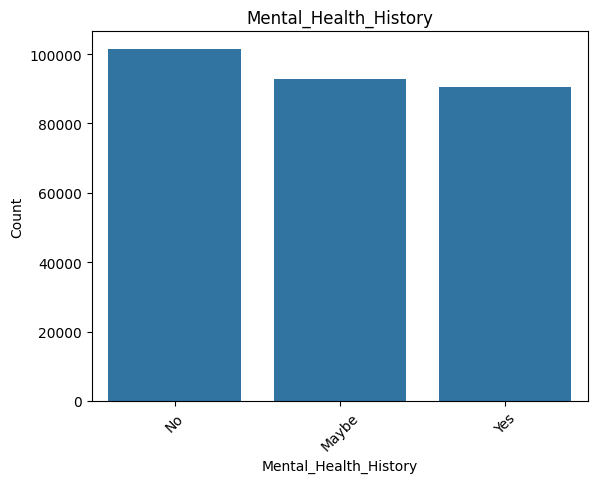

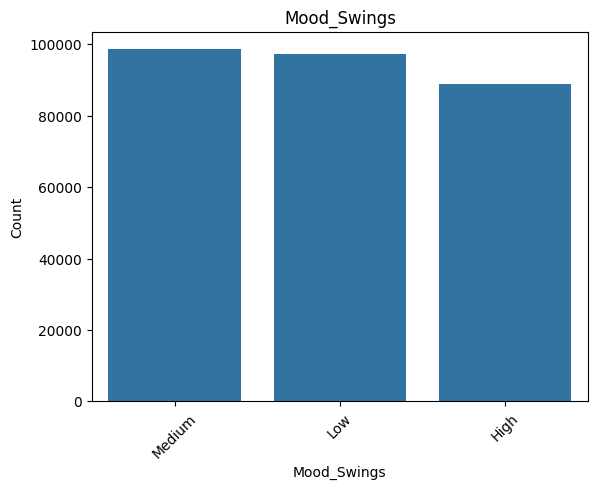

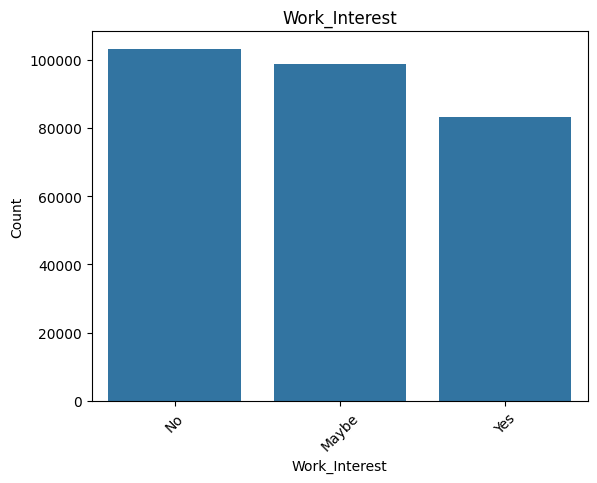

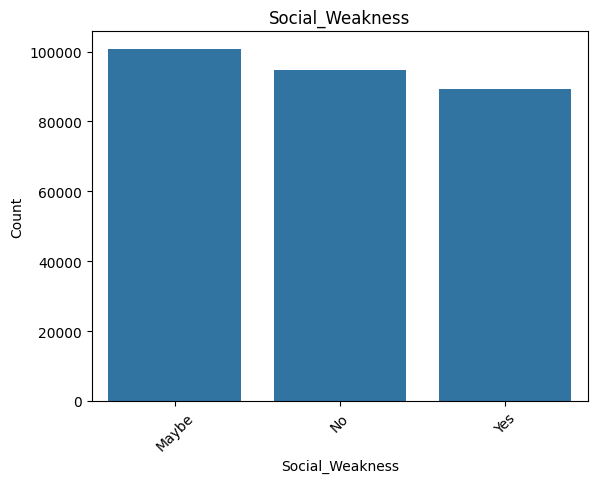

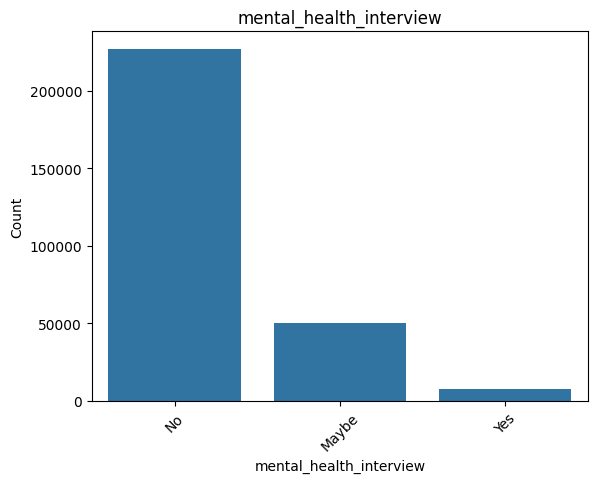

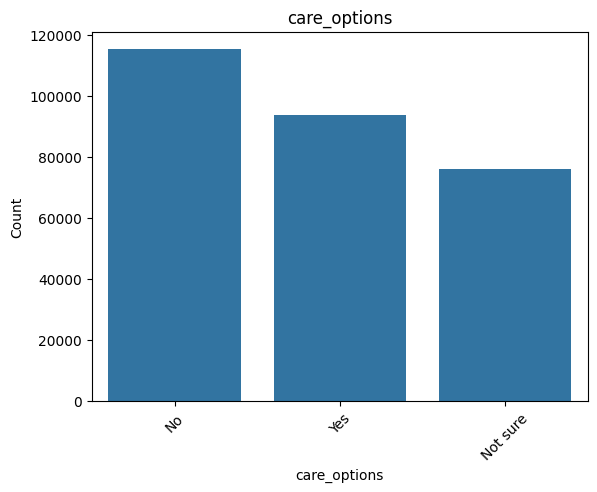

In [ ]:
for column in df.columns:
    if df[column].nunique() > 2:
        top_10_bar(column)

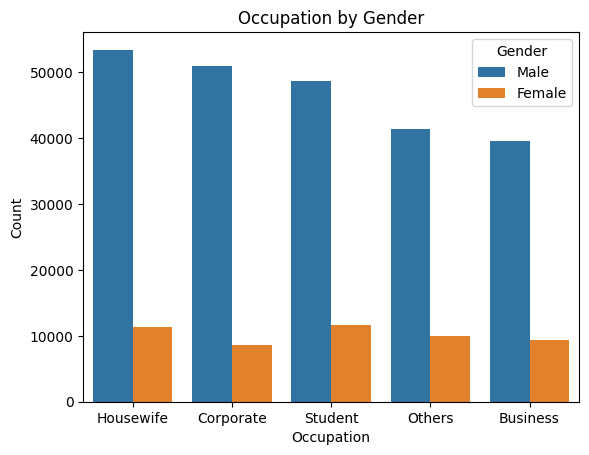

,Gender,Occupation,Count
5,Male,Housewife,53400
6,Male,Corporate,51000
7,Male,Student,48600
8,Male,Others,41400
9,Male,Business,39600
0,Female,Student,11564
1,Female,Housewife,11328
2,Female,Others,10030
3,Female,Business,9322
4,Female,Corporate,8614


In [ ]:
# Group data by Gender then filter by Occupation and count occurrences
gender_data = (
    df
    .groupby("Gender")["Occupation"]
    .value_counts()
    .reset_index(name = "Count")
    .sort_values(by = "Count", ascending = False)
)

sns.barplot(data = gender_data, x = "Occupation", y = "Count", hue = "Gender")
plt.title("Occupation by Gender")
plt.show()

gender_data

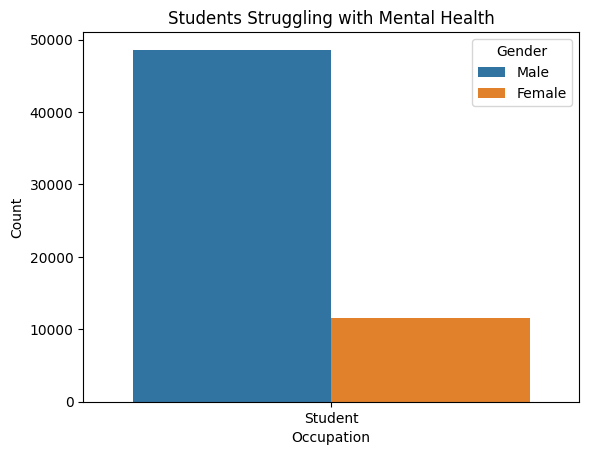

,Gender,Occupation,Count,Percentage
7,Male,Student,48600,80.8
0,Female,Student,11564,19.2


In [ ]:
# Filter the gender data to include only entries where the occupation is "Student"
student_data = gender_data[gender_data["Occupation"] == "Student"]

sns.barplot(data = student_data, x = "Occupation", y = "Count", hue = "Gender")
plt.title("Students Struggling with Mental Health")
plt.show()

# Get the total count
total_student_count = student_data["Count"].sum()

# Calculate percentages based on gender counts
student_data["Percentage"] = (
    student_data["Gender"]
    .apply(
        lambda gender: round((student_data.loc[student_data["Gender"] == gender, "Count"].iloc[0] / total_student_count) * 100, 1)
    )
)

student_data

In [ ]:
# Filter the DataFrame to include only United States students and count occurrences by gender
us_student_data = (
    df
    .loc[(df["Country"] == "United States") & (df["Occupation"] == "Student")]
    .groupby("Gender")["Occupation"]
    .value_counts()
    .reset_index(name = "Count")
)

# Get the total count
total_us_student_count = us_student_data["Count"].sum()

# Calculate percentages based on gender counts
us_student_data["Percentage"] = (
    us_student_data["Gender"]
    .apply(
        lambda gender: round((us_student_data.loc[us_student_data["Gender"] == gender, "Count"].iloc[0] / total_us_student_count) * 100, 1)
    )
)

us_student_data

,Gender,Occupation,Count,Percentage
0,Female,Student,7742,22.0
1,Male,Student,27378,78.0


In [ ]:
print(f"Out of {total_student_count:,} students around the world struggling with mental health, {total_us_student_count:,} are US students.")

Out of 60,164 students around the world struggling with mental health, 35,120 are US students.


### United States takes 58.4% of the global student mental health crisis!

# Data Preprocessing

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import joblib  # To save preprocessing artifacts


def frequency_encode(df, cols):
    """Frequency encode specified columns and save frequency maps."""
    freq_maps = {}
    for col in cols:
        freq_maps[col] = df[col].value_counts()
        df[f'{col}_encoded'] = df[col].map(freq_maps[col])
    df = df.drop(columns=cols)  # Drop original columns
    return df, freq_maps


def one_hot_encode(df, cols):
    """One-Hot Encode specified columns and save the encoder."""
    onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')
    encoded_data = onehot_encoder.fit_transform(df[cols])
    encoded_column_names = onehot_encoder.get_feature_names_out(cols)
    encoded_df = pd.DataFrame(encoded_data, columns=encoded_column_names)
    df = pd.concat([df.drop(columns=cols), encoded_df], axis=1)
    return df, onehot_encoder


def label_encode(df, cols):
    """Label encode specified columns and save the encoders."""
    label_encoders = {}
    for col in cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le
    return df, label_encoders


def clean_mood_swings(df, col='Mood_Swings'):
    """Clean and map the Mood_Swings column."""
    df[col] = df[col].astype(str).str.strip().str.lower()  # Clean the column
    mood_map = {'low': 0, 'medium': 1, 'high': 2}
    df[col] = df[col].map(mood_map)
    # Drop rows with unmapped (NaN) values
    print(f"Rows dropped due to unmapped Mood_Swings: {df[col].isna().sum()}")
    df = df.dropna(subset=[col])
    return df


# Full Pipeline
def preprocess_data(df):
    # Columns for processing
    frequency_encode_cols = ['Country']
    onehot_cols = ['Occupation', 'Days_Indoors']
    label_cols = [col for col in df.columns if col not in onehot_cols + frequency_encode_cols + ['Mood_Swings']]

    # Step 1: Frequency Encoding
    df, freq_maps = frequency_encode(df, frequency_encode_cols)
    joblib.dump(freq_maps, 'freq_maps.pkl')

    # Step 2: One-Hot Encoding
    df, onehot_encoder = one_hot_encode(df, onehot_cols)
    joblib.dump(onehot_encoder, 'onehot_encoder.pkl')

    # Step 3: Label Encoding
    df, label_encoders = label_encode(df, label_cols)
    joblib.dump(label_encoders, 'label_encoders.pkl')

    # Step 4: Clean and Map Mood_Swings
    df = clean_mood_swings(df)

    # Final Output
    print("Final Transformed DataFrame:")
    print(df.info())
    return df


# Load Data and Apply Preprocessing
df = preprocess_data(df)



Rows dropped due to unmapped Mood_Swings: 7326
Final Transformed DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 284858 entries, 3 to 292363
Data columns (total 22 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Gender                           284858 non-null  int64  
 1   self_employed                    284858 non-null  int64  
 2   family_history                   284858 non-null  int64  
 3   treatment                        284858 non-null  int64  
 4   Growing_Stress                   284858 non-null  int64  
 5   Changes_Habits                   284858 non-null  int64  
 6   Mental_Health_History            284858 non-null  int64  
 7   Mood_Swings                      284858 non-null  float64
 8   Coping_Struggles                 284858 non-null  int64  
 9   Work_Interest                    284858 non-null  int64  
 10  Social_Weakness                  284858 non-null  int64  

Value Counts for Mood_Swings:
Mood_Swings
1.0    98592
0.0    97392
2.0    88874
Name: count, dtype: int64


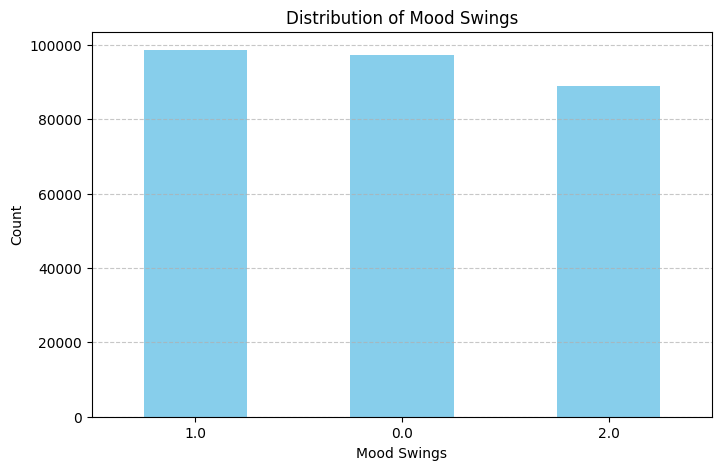

In [ ]:
import matplotlib.pyplot as plt

# Check for unique values and their counts in Mood_Swings
print("Value Counts for Mood_Swings:")
print(df['Mood_Swings'].value_counts(dropna=False))  # Include NaN values in count

# Plot the distribution of Mood_Swings
plt.figure(figsize=(8, 5))
df['Mood_Swings'].value_counts(dropna=False).plot(kind='bar', color='skyblue')
plt.title("Distribution of Mood Swings")
plt.xlabel("Mood Swings")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
print("Columns in DataFrame:", df.columns)


Columns in DataFrame: Index(['Gender', 'self_employed', 'family_history', 'treatment',
       'Growing_Stress', 'Changes_Habits', 'Mental_Health_History',
       'Mood_Swings', 'Coping_Struggles', 'Work_Interest', 'Social_Weakness',
       'mental_health_interview', 'care_options', 'Country_encoded',
       'Occupation_Corporate', 'Occupation_Housewife', 'Occupation_Others',
       'Occupation_Student', 'Days_Indoors_15-30 days',
       'Days_Indoors_31-60 days', 'Days_Indoors_Go out Every day',
       'Days_Indoors_More than 2 months'],
      dtype='object')


In [ ]:
encoded_df = df
X = df.drop("Mood_Swings", axis = 1)

y = df["Mood_Swings"]
y

,Mood_Swings
3,1.0
4,1.0
5,1.0
6,1.0
7,1.0
...,...
292359,0.0
292360,0.0
292361,0.0
292362,0.0


In [ ]:
X.columns

Index(['Gender', 'self_employed', 'family_history', 'treatment',
       'Growing_Stress', 'Changes_Habits', 'Mental_Health_History',
       'Coping_Struggles', 'Work_Interest', 'Social_Weakness',
       'mental_health_interview', 'care_options', 'Country_encoded',
       'Occupation_Corporate', 'Occupation_Housewife', 'Occupation_Others',
       'Occupation_Student', 'Days_Indoors_15-30 days',
       'Days_Indoors_31-60 days', 'Days_Indoors_Go out Every day',
       'Days_Indoors_More than 2 months'],
      dtype='object')

In [ ]:
nan_rows = df[df['Mood_Swings'].isna()]
nan_rows

,Gender,self_employed,family_history,treatment,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,...,care_options,Country_encoded,Occupation_Corporate,Occupation_Housewife,Occupation_Others,Occupation_Student,Days_Indoors_15-30 days,Days_Indoors_31-60 days,Days_Indoors_Go out Every day,Days_Indoors_More than 2 months


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(227886, 21) (56972, 21)
(227886,) (56972,)


# Model Building & Comparisons

In [ ]:
def pipeline_classification(pipelines):
  """
  Performs classification using cross-validation, evaluates different models,
  and makes predictions for each model on the test set.

  Args:
      pipelines (list): List of tuples containing model names and pipeline objects.

  Returns:
      pandas.DataFrame: A DataFrame containing model names, mean accuracy, standard deviation,
                        and a dictionary with test set predictions for each model.
  """

  # Initialize lists to store results
  cv_results = []
  model_names = []
  model_predictions = {}
  model_probabilities = {}

  # Perform cross-validation and store results
  for name, pipe in pipelines:
      # Fit the pipeline to the training data
      pipe.fit(X_train, y_train)

      kfold = KFold(n_splits = 10, shuffle = True)
      cv_results.append(cross_val_score(pipe, X_train, y_train, cv = kfold, scoring = 'accuracy', n_jobs = -1))
      model_names.append(name)
      model_predictions[name] = pipe.predict(X_test)

      # Calculate probabilities on the test set and store them
      model_probabilities[name] = pipe.predict_proba(X_test)

  # Plot the results
  plt.boxplot(cv_results)
  plt.xticks(range(1, len(model_names) + 1), model_names)
  plt.title('Algorithm Comparison')
  plt.xlabel('Model')
  plt.ylabel('Accuracy')
  plt.show()

  # Convert results to a DataFrame
  results_df = pd.DataFrame({
      'Model': model_names,
      'Mean Accuracy': [scores.mean() for scores in cv_results],
      'Standard Deviation': [scores.std() for scores in cv_results]
  })

  return results_df, model_predictions, model_probabilities


In [ ]:
!pip install --upgrade xgboost


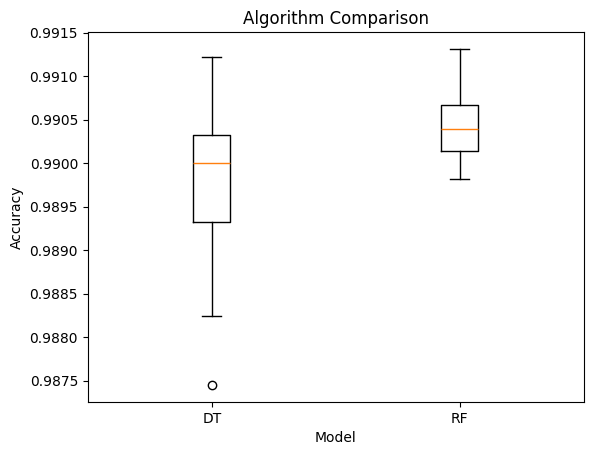

,Model,Mean Accuracy,Standard Deviation
0,DT,0.989675,0.001066
1,RF,0.990407,0.000442


In [ ]:
# Define the list of pipelines
pipelines = [
    ('DT', Pipeline([('scaler', MinMaxScaler()), ('DT', DecisionTreeClassifier())])),
    ('RF', Pipeline([('scaler', MinMaxScaler()), ('RF', RandomForestClassifier())]))
  ]

results_df, model_predictions, model_probabilities = pipeline_classification(pipelines)
results_df

In [ ]:
def plot_confusion_matrix(y_true, y_pred, class_names = None, cmap = "Blues", title = ""):
  """
  Plots a confusion matrix for classification tasks.

  Args:
      y_true (array-like): True labels for the data.
      y_pred (array-like): Predicted labels for the data.
      class_names (list, optional): List of class names for the labels.
      cmap (str, optional): Colormap to use for the heatmap. Defaults to 'Blues'.
      title (str, optional): Title for the confusion matrix plot. Defaults to an empty string.

  Returns:
      None
  """

  cm = confusion_matrix(y_true, y_pred)

  if class_names is None:
      class_names = np.unique(y_true)

  plt.figure(figsize = (8, 6))
  sns.heatmap(
      cm,
      annot = True,
      fmt = 'd',
      cmap = cmap,
      xticklabels = class_names,
      yticklabels = class_names
  )

  plt.title(f"Confusion Matrix - {model_name}")
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.show()

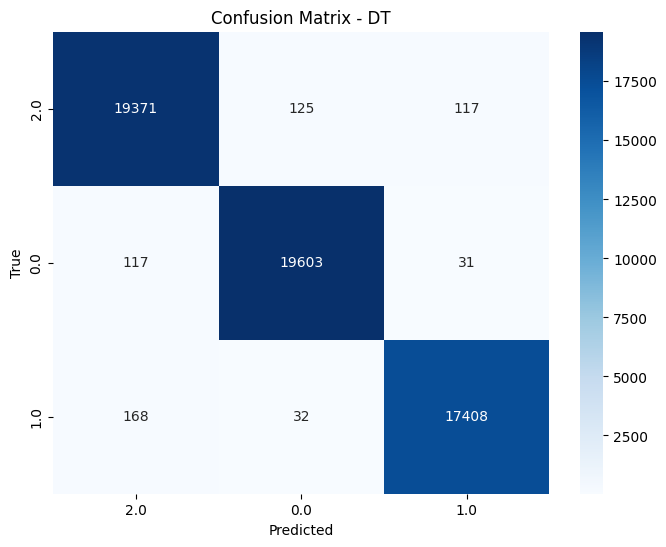

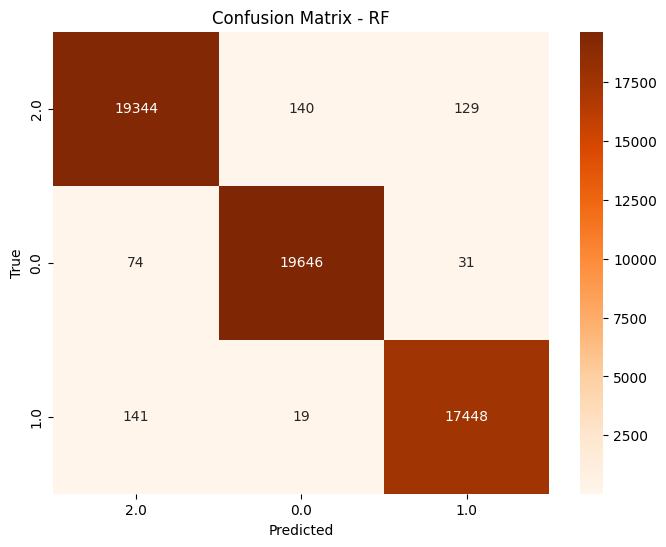

In [ ]:
# Extract model names
models = results_df.loc[:, "Model"]

# Extract model predictions
predictions = list(model_predictions.values())

# Define labels for the class outputs
labels = df["Mood_Swings"].unique()[::-1]

# Define a dictionary mapping model names to colormaps
cmap_dict = {'DT': 'Blues', 'RF': 'Oranges', 'XGB': 'YlOrRd'}

for model_name, y_pred in zip(models, predictions):
  plot_confusion_matrix(
      y_test,
      y_pred,
      class_names = labels,
      cmap = cmap_dict.get(model_name),
      title = model_name
  )

In [ ]:
def get_model_scores(models, predictions, y_test, average = "None"):
  """
  Calculates and returns precision, recall, and F1 scores for each model.

  Args:
      models: A list of trained machine learning models.
      predictions: A list of predictions for each model, corresponding to the models list.
      y_test: True labels for the test set.
      average (str, optional): Averaging type for metrics.

  Returns:
      A Pandas DataFrame containing the model scores.
  """

  scores = [{
      'Model': model_name,
      'Accuracy': round(accuracy_score(y_test, y_pred), 3),
      'Precision': round(precision_score(y_test, y_pred, average = average), 3),
      'Recall': round(recall_score(y_test, y_pred, average = average), 3),
      'F1 Score': round(f1_score(y_test, y_pred, average = average), 3)
  } for model_name, y_pred in zip(models, predictions)]

  scores_df = pd.DataFrame(scores)

  return scores_df

In [ ]:
scores = get_model_scores(models, predictions, y_test, average = "macro")

scores

,Model,Accuracy,Precision,Recall,F1 Score
0,DT,0.990,0.990,0.990,0.990
1,RF,0.991,0.991,0.991,0.991


#Report: Model Performance Comparison (DT, RF)
Three models—Decision Tree (DT), and Random Forest (RF)—were evaluated based on their Accuracy, Precision, Recall, and F1 Score using a macro average approach. The results are as follows:

**Decision Tree (DT):**
Accuracy: 0.990
Precision, Recall, and F1 Score: 0.990
The Decision Tree model performed exceptionally well, achieving high scores across all metrics. However, it slightly underperformed compared to the other models.

**Random Forest (RF):**
Accuracy: 0.991
Precision, Recall, and F1 Score: 0.991
Random Forest demonstrated improved performance compared to Decision Tree, achieving a slightly higher accuracy and other metrics. This indicates the benefit of ensemble learning, as Random Forest reduces overfitting by combining multiple decision trees.


**Conclusion:**
Both Random Forest and Decision Tree model achieved near-identical results. Given their superior performance, Random Forest remains a reliable choice for robust, ensemble-based solutions.